# Digit Recognition


Competition Description
MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, the goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. 

## Import the Essential Libraries

In [0]:
#!pip install tensorflow keras numpy seaborn pandas sklearn matplotlib 

In [0]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from keras.models import Sequential 
from keras.layers import Dense, Conv2D,MaxPool2D,Flatten,Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


## Uploading the data 

In [0]:
train_df = pd.read_csv("drive/My Drive/digit_recognition/train.csv")
test_df = pd.read_csv("drive/My Drive/digit_recognition/test.csv")
submission = pd.read_csv("drive/My Drive/digit_recognition/sample_submission.csv")


In [10]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
train_df.shape, test_df.shape

((42000, 785), (28000, 784))

## Train DATA Visualization

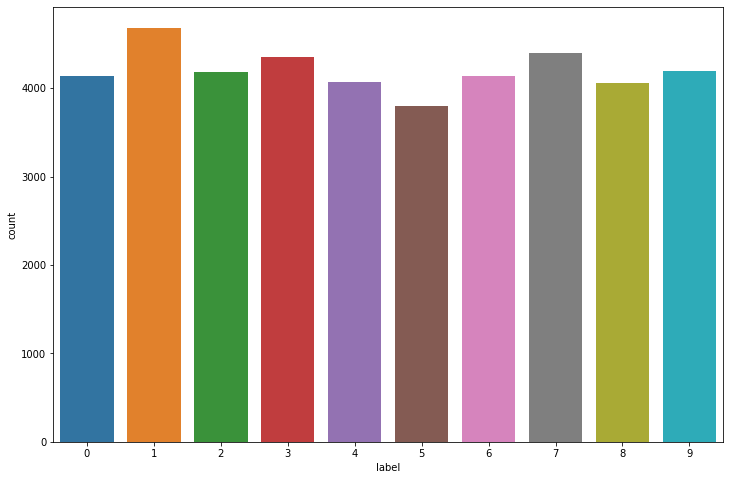

In [26]:
plt.figure(figsize = (12,8))
sns.countplot(train_df["label"]);

 Acccording to this countplot, it is evident that each label has comparable enough data. So the data is distributed almost evenly for each label

## Data Preprocessing 

In [30]:
encoder = OneHotEncoder() 
y_train_df = train_df.label.values
y_train_df = encoder.fit_transform(y_train_df.reshape(-1,1)).toarray()
del train_df["label"]
x_train_df = train_df.values
x_train_df.shape, y_train_df.shape

((42000, 784), (42000, 10))

In [32]:
x_test_df = test_df.values
x_test_df.shape

(28000, 784)

In [0]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0,1))
x_train_df = scaler.fit_transform(x_train_df)
x_test_df =  scaler.fit_transform(x_test_df)



In [0]:
# Reshaping the data from model 1D to 3D
x_train_df = x_train_df.reshape(-1,28,28,1)
x_test_df = x_test_df.reshape(-1,28,28,1)

In [40]:
x_train_df.shape,y_train_df.shape

((42000, 28, 28, 1), (42000, 10))

In [41]:
x_test_df.shape

(28000, 28, 28, 1)

In [0]:
# Splititng the train data into tarin and validation daatsets with train_test_split method from the scikit learn 
x_train,x_val,y_train,y_val = train_test_split(x_train_df,y_train_df, test_size = 0.2, random_state = 42)


In [43]:
x_train.shape,y_train.shape

((33600, 28, 28, 1), (33600, 10))

In [44]:
x_val.shape, y_val.shape

((8400, 28, 28, 1), (8400, 10))

## Preview of the Images 


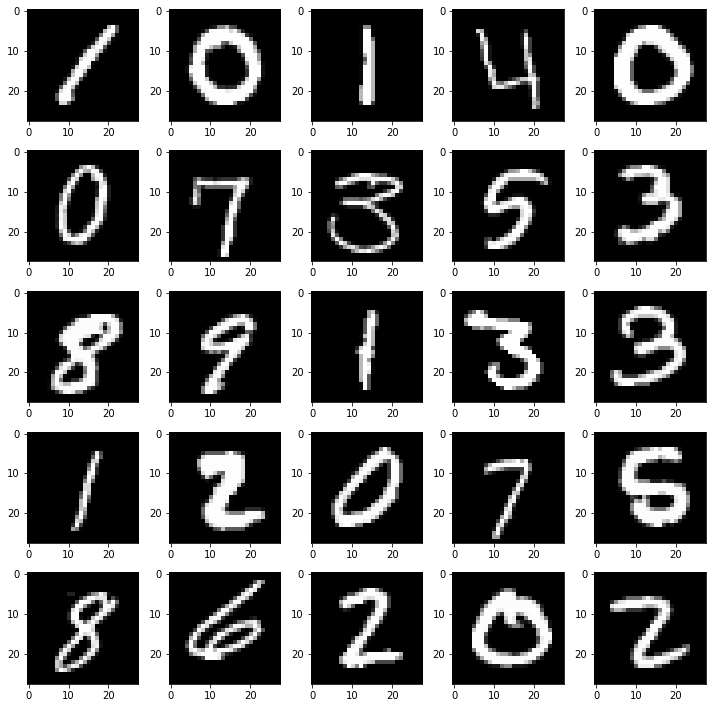

In [46]:
fig, ax = plt.subplots(5,5)
fig.set_size_inches(10,10)
k = 0
for i in range(5):
  for j in range(5):
    ax[i,j].imshow(x_train_df[k].reshape(28,28), cmap="gray")
    k +=1
  plt.tight_layout()  

## Creating the model 

In [47]:
model=Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units = 10 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 128)        

In [48]:
rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
history = model.fit(x_train, y_train, batch_size=40, epochs=20, validation_data=(x_val, y_val), callbacks=[rlrp])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 75s 2ms/step - loss: 0.2644 - accuracy: 0.9102 - val_loss: 0.0808 - val_accuracy: 0.9749
Epoch 2/20
33600/33600 [==============================] - 77s 2ms/step - loss: 0.0665 - accuracy: 0.9795 - val_loss: 0.0622 - val_accuracy: 0.9813
Epoch 3/20
33600/33600 [==============================] - 75s 2ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 0.0813 - val_accuracy: 0.9786
Epoch 4/20
33600/33600 [==============================] - 74s 2ms/step - loss: 0.0384 - accuracy: 0.9883 - val_loss: 0.0423 - val_accuracy: 0.9871
Epoch 5/20
33600/33600 [==============================] - 74s 2ms/step - loss: 0.0307 - accuracy: 0.9911 - val_loss: 0.0552 - val_accuracy: 0.9835
Epoch 6/20
33600/33600 [==============================] - 73s 2ms/step - loss: 0.0280 - accuracy: 0.9916 - val_loss: 0.0347 - val_accuracy: 0.9898
Epoch 7/20
33600/33600 [==============================] - 77s 2ms/ste

8400/8400 [==============================] - 5s 555us/step
Accuracy of our model on Validation Data :  99.19047355651855 %


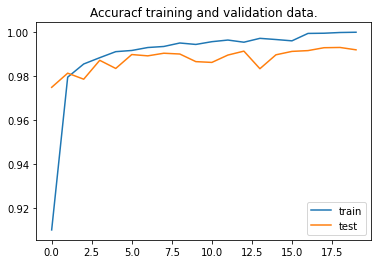

In [50]:
print("Accuracy of our model on Validation Data : " , model.evaluate(x_val,y_val)[1]*100 , "%")
plt.title('Accuracf training and validation data.')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()

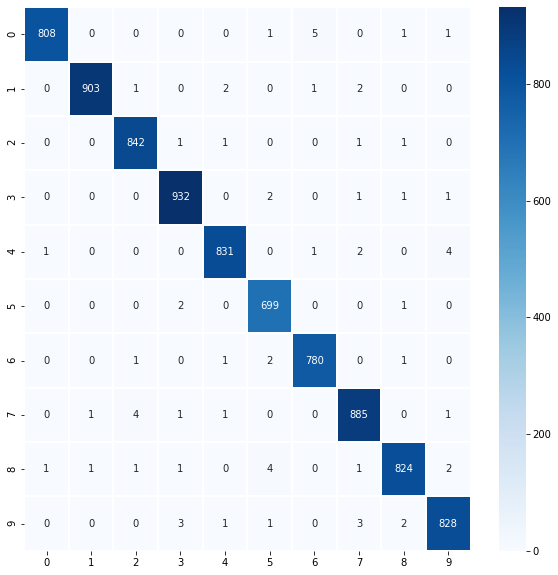

In [52]:
# predicting on validation data.
pred_val = model.predict_classes(x_val)
new_y_val=[]
for i in y_val:
    new_y_val.append(np.argmax(i))

cm = confusion_matrix(new_y_val, pred_val)
cm = pd.DataFrame(cm , index = [i for i in range(10)] , columns = [i for i in range(10)])
plt.figure(figsize = (10,10))
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='');

In [0]:
# Save the model in Keras h5 format
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (str)
  for clarity and reuse.
  """
  # Create model directory with current time
  modeldir = os.path.join("drive/My Drive/digit_recognition/model")
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [56]:
# Save the model 
save_model(model, suffix = "train_digit_Adam")

Saving model to: drive/My Drive/digit_recognition/model-train_digit_Adam.h5...


'drive/My Drive/digit_recognition/model-train_digit_Adam.h5'

## Now lets predict for our test data

In [57]:
predictions = model.predict_classes(x_test_df)
predictions[:5]

array([2, 0, 9, 9, 3])

In [0]:
submission['Label'] = predictions
submission.to_csv("submission.csv" , index = False)

In [60]:
my_submission = pd.read_csv("drive/My Drive/digit_recognition/submission.csv")
my_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
